## Lecture 5 - probability and statistics

In this notebook we will collect all the examples from Lecture 5 ``Probability and statistics''

## Histogram

In [1]:
import numpy as np                   # numerical stuff
from matplotlib import pyplot as plt # plotting functions
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# let's create some data
x = np.array([12.1,12.3,12.2,12.2,12.4,12.3,12.2,12.4,12.2,12.5])

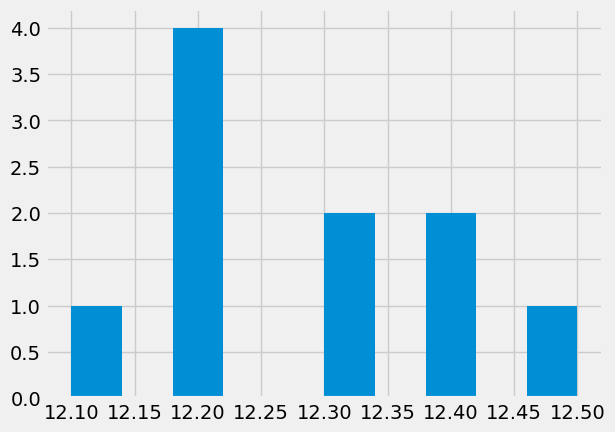

In [3]:
# create histogram using matplotlib and store the histogram output
x_modes = plt.hist(x) #note that we did not specify number of bins

In [4]:
# the output in x_modes

# which bin has most samples? 
x_mode_ind = np.argmax(x_modes[0])

# how many counts in the top column? 
x_mode_count = x_modes[0][x_mode_ind]

# what is the value of most frequent sample: 
x_mode_val = x[x_mode_ind]


print(f"Data: {x}")
print(f"Mean: {np.mean(x):.2f}, Median: {np.median(x):.2f} STD: {np.std(x):.2f}")
print(f"Mode: {x_mode_val} appears {x_mode_count} times" )

Data: [12.1 12.3 12.2 12.2 12.4 12.3 12.2 12.4 12.2 12.5]
Mean: 12.28, Median: 12.25 STD: 0.12
Mode: 12.2 appears 4.0 times


## Let's create our own histogram 

In [5]:
nbins = 7 # better then the default choice 


hist_vals = np.zeros(nbins)
min_val = x.min() - 0.05
max_val = x.max() + 0.05
for d in x: # for every item
    # find which bin it belongs 
    bin_number = int(nbins * ((d - min_val) / (max_val - min_val)))
    
    # add a counter
    hist_vals[bin_number] += 1

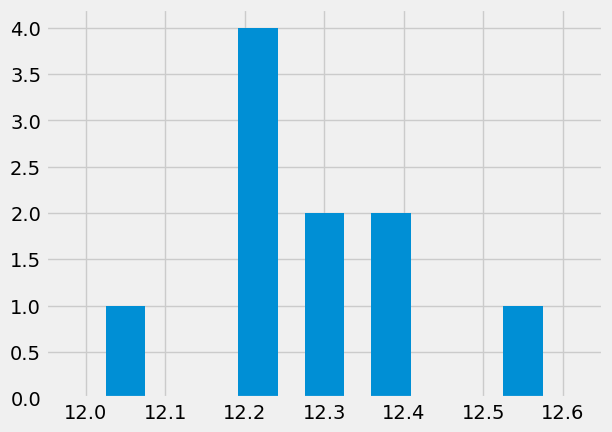

In [6]:
# let's plot some columns
plt.bar(np.linspace(min_val,max_val,nbins),hist_vals,width = 0.05)
plt.xlim([min_val-.1,max_val+.1]);

## Now we can load some real long sample of turbulent temperature fluctuations

Text(0, 0.5, '$T^\\circ$C')

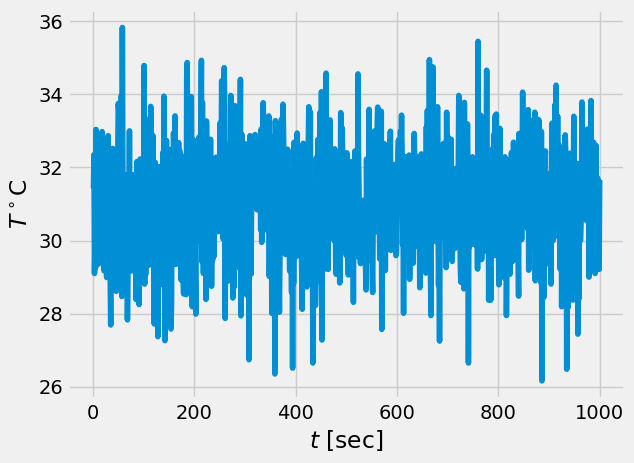

In [7]:
data = np.loadtxt('../data/thermocouples.dat',skiprows=1)
t = data[:,0]
T = data[:,1]

# visualize the data first
plt.plot(t,T)
plt.xlabel('$t$ [sec]')
plt.ylabel(r'$T^\circ$C') 

In [8]:
# what are the recommended number of bins, see wikipedia 

# for short samples
print(f" for short samples: {np.int(1 + 3.3*np.log10(len(t)))}")
print(f" another rule {np.int(1.87*(len(t)-1)**(0.4))}")


# for long samples
print(f" for long samples: {np.int(2*len(t)**(0.33))}")
print(f" for very long ones: {np.int(np.sqrt(len(t)))}")

 for short samples: 10
 another rule 29
 for long samples: 19
 for very long ones: 31


/tmp/ipykernel_145522/12325100.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(f" for short samples: {np.int(1 + 3.3*np.log10(len(t)))}")
/tmp/ipykernel_145522/12325100.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informatio

Text(0.5, 1.0, '19 bins')

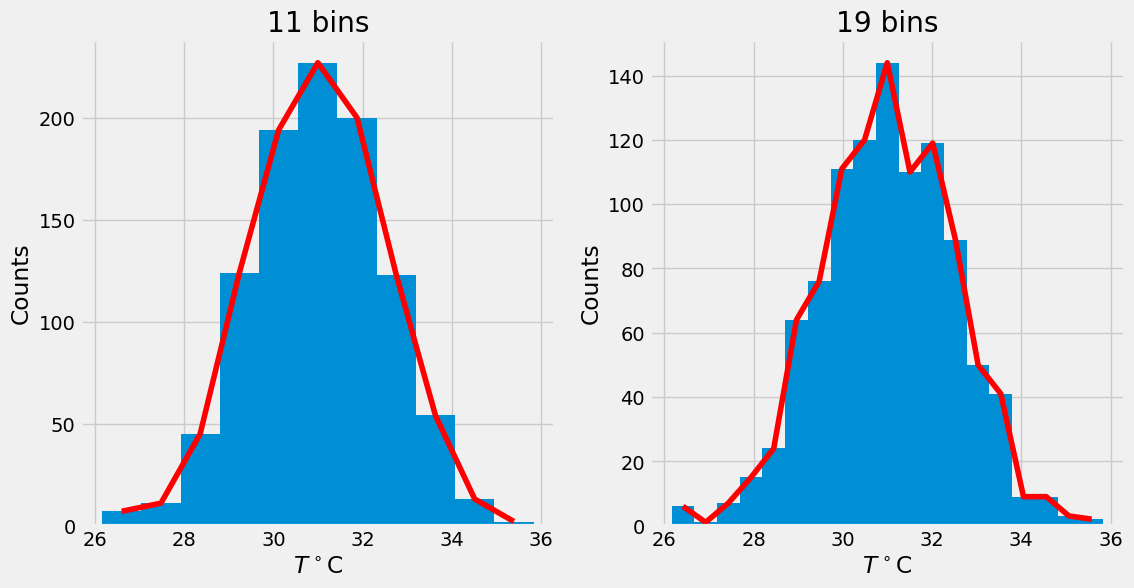

In [9]:
J = 11 # we better use odd number of bins


fig,ax = plt.subplots(1,2,figsize=(12,6))

n,bins,patches = ax[0].hist(T,J)
x = bins[:-1]+0.5*np.diff(bins)[0]

ax[0].plot(x,n,'r')
ax[0].set_xlabel(r'$T^\circ$C')
ax[0].set_ylabel('Counts')
ax[0].set_title('11 bins')

J = 19 # we better use odd number of bins

n,bins,patches = ax[1].hist(T,J)
x = bins[:-1]+0.5*np.diff(bins)[0]

ax[1].plot(x,n,'r')
ax[1].set_xlabel(r'$T^\circ$C')
ax[1].set_ylabel('Counts')
ax[1].set_title('19 bins')

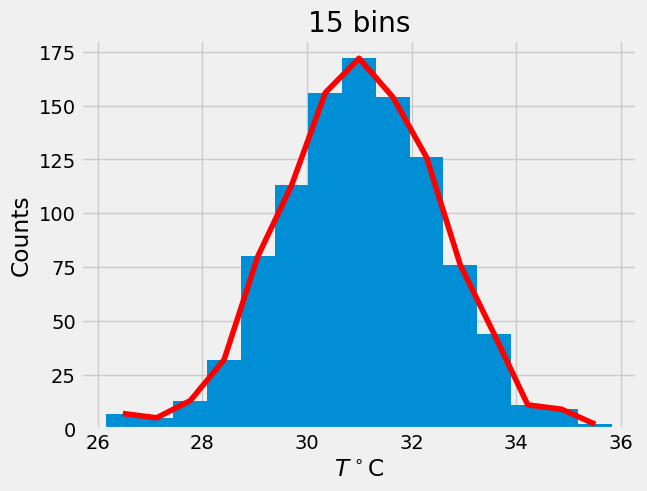

In [10]:
# trial and error

J = 15
n,bins,patches = plt.hist(T,J)
x = bins[:-1] + 0.5*np.diff(bins)[0]

plt.plot(x,n,'r')
plt.xlabel(r'$T^\circ$C')
plt.ylabel('Counts')
plt.title('15 bins');

Text(0.5, 1.0, 'Vertically normalized')

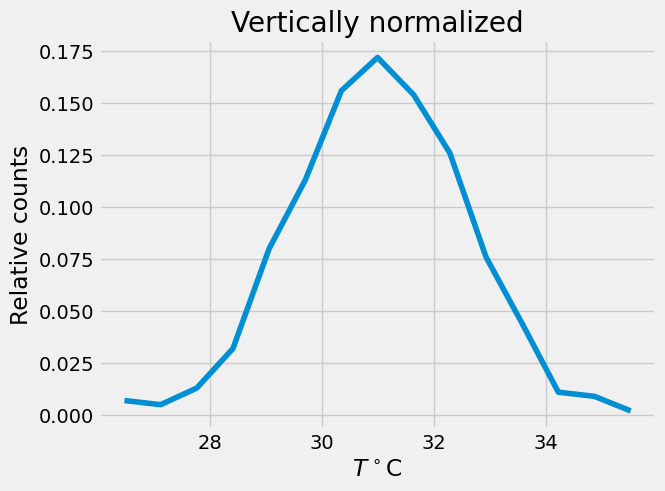

In [11]:
# vertical normalization
p = n/1000. # data.shape[0]

plt.plot(x,p)
plt.xlabel(r'$T^\circ$C')
plt.ylabel('Relative counts')
plt.title('Vertically normalized')

Text(0, 0.5, 'Probability Density')

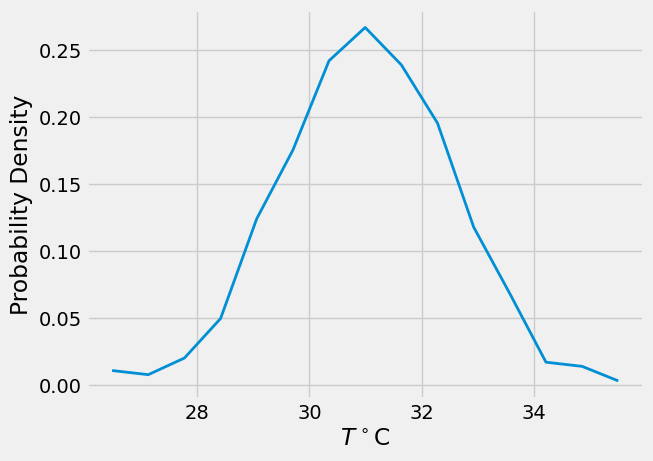

In [12]:
# area normalization
f = p/np.diff(x)[0]

plt.plot(x,f,lw=2)
plt.xlabel(r'$T^\circ$C')
plt.ylabel('Probability Density')

Text(0.5, 1.0, 'Final result')

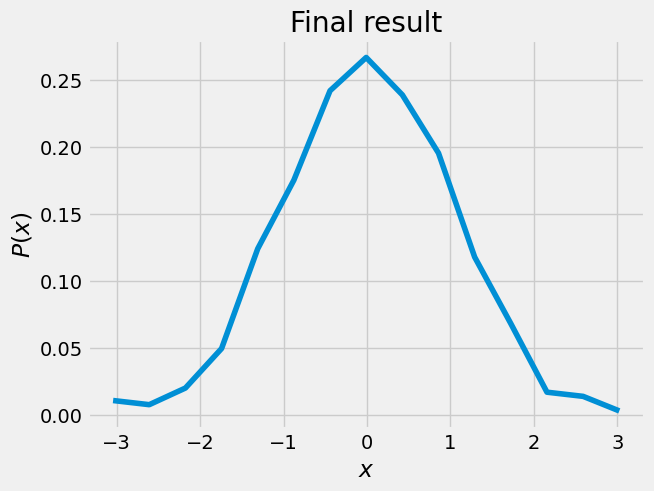

In [13]:
# horizontal normalization, transfer to Gaussian z
z = (x - T.mean())/T.std()

plt.plot(z,f)
plt.xlabel(r'$x$ ')
plt.ylabel(r'$P(x)$')
plt.title('Final result')

Text(0.5, 1.0, 'Blue - original, red - Gaussian')

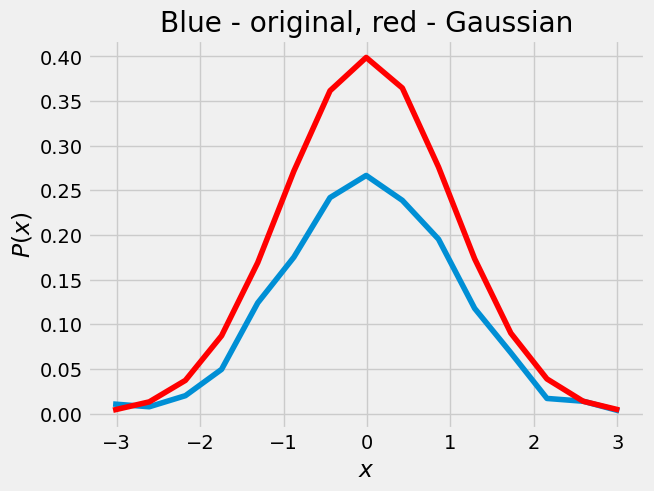

In [14]:
def gaussian(x,mu,sig):
    return 1/(sig*np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*sig**2))

plt.plot(z,f,z,gaussian(z,0,1),'r')
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.title('Blue - original, red - Gaussian')

In [15]:
import scipy.stats as st

print(("T skewness = %.3f, kurtosis = %.3f" % (st.skew(T), st.kurtosis(T))))
tmp = np.random.randn(1000,1)
print(("Normal distribution skewness = %.3f, kurtosis = %.3f" % (st.skew(tmp), st.kurtosis(tmp))))

T skewness = -0.069, kurtosis = 0.079
Normal distribution skewness = 0.023, kurtosis = -0.021


In [16]:
# area under the curve
print(("Area under the curve = %f " % trapz(f,x)))

NameError: name 'trapz' is not defined

# Chi-square test


How well does a set of measurements follow an assumed distribution function? 

In [ ]:
data = np.array([0.98, 1.07, 0.86, 1.16, 0.96, 0.68, 1.34, 1.04, 1.21, 0.86, 1.02, 1.26, \
1.08, 1.02, 0.94, 1.11, 0.99, 0.78, 1.06, 0.96])

In [ ]:
# import matplotlib.pyplot as plt
plt.plot(data,'o')
plt.xlabel('$i$')
plt.ylabel('$x_i$');

In [ ]:
np.mean(data), np.std(data), data.shape[0], np.min(data), np.max(data)

In [ ]:
n = data.shape[0]
K = np.int(1.87 * (n - 1)**0.4 + 1) 
print(f"best number of bins is {K}")

bins = np.arange(0.65, 1.45, 0.1)
print(bins)

In [ ]:
# let's see the histogram
plt.hist(data,bins=bins,width=0.07)

$\chi^2 = \sum_{j} (n_j - n'_j)^2 / n'_j \quad j = 1,2, ..., k$  bins


$n'_j = N (p(x_u) - p(x_l))$

$p(x_u) = \int\limits_{0}^{x_u} G(x) $  

the goodness of fit test evaluates the null hypothesis $H_0$ that the data are described by the assumed distribution

In [ ]:
# calculate probability
from math import erf, sqrt
x1 = 0.75
x2 = 0.85

mu = data.mean()
sigma = data.std()

# probability from Z=0 to lower bound
def probability(x, mu, sigma):
    ''' Probability is the area under the Gaussian curve which is identical to the 
    cumulative density function value '''
    return 0.5 * erf( (x-mu) / (sigma*sqrt(2.)) )

def expected(lower,upper,mu,sigma,n):
    ''' Expected number of samples in some bin is the number of samples times the 
    probability of a variable to be between the lower and upper edge of the bin  '''
    # return np.abs(n * (probability(lower,mu,sigma) - probability(upper,mu,sigma)))
    return np.abs(n*(stats.norm(mu, sigma).cdf(lower) - stats.norm(mu, sigma).cdf(upper)))


print(expected(0.75,0.85,mu,sigma,20))

In [ ]:
oh = np.histogram(data,bins=bins)

x = []
y = []

for i in range(len(bins)-1):
    x.append((oh[1][i]+oh[1][i+1])/2) # middle of the bin
    y.append(expected(bins[i],bins[i+1],mu,sigma,n))

chisq = []
for a,b in zip(oh[0],y):
    chisq.append( (a-b)**2/b )

plt.bar(x,y,width=0.02,color='r',alpha=.8)
plt.bar(x,oh[0],width=.05,alpha=.5)
plt.legend(('$E_i$','$O_i$'))

print(f"chi square = {np.sum(chisq)}")

In [ ]:
# degrees of freedom = K.- 2 because we used mean and std:
df = K - 2

In [ ]:
pval = 1 - stats.chi2.cdf(np.sum(chisq), K-2);
print(f'Confidence level is {(pval*100)} percent') 

##### From sample to population statistics 
or from a histogram to the probability density function

1. [Histogram to distribution](histogram_to_distribution.ipynb)
1. [chi^2 test of normal distribution using SciPy stats](chi_square_test_example.ipynb)
1. [Central limit theorem illustration](Central_limit_theorem_illustration.ipynb)
1. [Various probability Distributions and the Central Limit Theorem](distributions.ipynb)
1. [Student t-distribution](t-distribution.ipynb)
1. [t-test comparing two samples](t-test.ipynb)